<a href="https://colab.research.google.com/github/kentaNagasawa1996/SPI_Language--NK/blob/master/%E6%84%9F%E6%83%85%E6%A5%B5%E6%80%A7%E5%88%86%E6%9E%90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! wget https://github.com/ids-cv/wrime/raw/master/wrime-ver1.tsv

--2024-03-20 10:19:37--  https://github.com/ids-cv/wrime/raw/master/wrime-ver1.tsv
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/ids-cv/wrime/master/wrime-ver1.tsv [following]
--2024-03-20 10:19:38--  https://raw.githubusercontent.com/ids-cv/wrime/master/wrime-ver1.tsv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9487235 (9.0M) [text/plain]
Saving to: ‚Äòwrime-ver1.tsv‚Äô

wrime-ver1.tsv      100%[===================>]   9.05M  --.-KB/s    in 0.05s   

2024-03-20 10:19:39 (201 MB/s) - ‚Äòwrime-ver1.tsv‚Äô saved [9487235/9487235]



In [2]:
!pip install transformers[torch]
!pip install accelerate

     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 290.1/290.1 kB 5.2 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 23.7/23.7 MB 47.3 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 823.6/823.6 kB 38.3 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 14.1/14.1 MB 36.7 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 731.7/731.7 MB 1.4 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 410.6/410.6 MB 2.6 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ

In [3]:
import pandas as pd
df_wrime = pd.read_table('wrime-ver1.tsv')
df_wrime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43200 entries, 0 to 43199
Data columns (total 44 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Sentence                   43200 non-null  object
 1   UserID                     43200 non-null  int64 
 2   Datetime                   43200 non-null  object
 3   Train/Dev/Test             43200 non-null  object
 4   Writer_Joy                 43200 non-null  int64 
 5   Writer_Sadness             43200 non-null  int64 
 6   Writer_Anticipation        43200 non-null  int64 
 7   Writer_Surprise            43200 non-null  int64 
 8   Writer_Anger               43200 non-null  int64 
 9   Writer_Fear                43200 non-null  int64 
 10  Writer_Disgust             43200 non-null  int64 
 11  Writer_Trust               43200 non-null  int64 
 12  Reader1_Joy                43200 non-null  int64 
 13  Reader1_Sadness            43200 non-null  int64 
 14  Reader

In [4]:
# Plutchik„ÅÆ8„Å§„ÅÆÂü∫Êú¨ÊÑüÊÉÖ
emotion_names = ['Joy', 'Sadness', 'Anticipation', 'Surprise', 'Anger', 'Fear','Disgust','Trust']

# ÂÆ¢Ë¶≥ÊÑüÊÉÖ„ÅÆÂπ≥ÂùáÔºà"Avg. Readers_*"Ôºâ „ÅÆÂÄ§„ÇílistÂåñ„Åó„ÄÅÊñ∞„Åó„ÅÑÂàó„Å®„Åó„Å¶ÂÆöÁæ©„Åô„Çã
df_wrime['readers_emotion_intensities'] = df_wrime.apply(lambda x: [x['Avg. Readers_' + name] for name in emotion_names], axis=1)

# ÊÑüÊÉÖÂº∑Â∫¶„Åå‰Ωé„ÅÑ„Çµ„É≥„Éó„É´„ÅØÈô§Â§ñ„Åô„Çã
# (readers_emotion_intensities „ÅÆ max „ÅåÔºí‰ª•‰∏ä„ÅÆ„Çµ„É≥„Éó„É´„ÅÆ„Åø„ÇíÂØæË±°„Å®„Åô„Çã)
is_target = df_wrime['readers_emotion_intensities'].map(lambda x: max(x) >= 2)
df_wrime_target = df_wrime[is_target]

In [5]:
# train / test „Å´ÂàÜÂâ≤„Åô„Çã
df_groups = df_wrime_target.groupby('Train/Dev/Test')
df_train = df_groups.get_group('train')
df_test = pd.concat([df_groups.get_group('dev'), df_groups.get_group('test')])
print('train :', len(df_train))  # train : 17104
print('test :', len(df_test))    # test : 1133

train : 17104
test : 1133


In [6]:
# HuggingFace Transformers „ÅÆ„Ç§„É≥„Çπ„Éà„Éº„É´
# - transformers : ‰∏ª„Åü„Çã„É¢„Ç∏„É•„Éº„É´Ôºà„É¢„Éá„É´„ÇÑ„Éà„Éº„ÇØ„Éä„Ç§„Ç∂)
# - datasets : HuggingFace„Åß„ÄÅ„Éá„Éº„Çø„Çª„ÉÉ„Éà„ÇíÊâ±„ÅÜ„Åü„ÇÅ„ÅÆ„É¢„Ç∏„É•„Éº„É´
# cf. https://huggingface.co/docs/transformers/installation
! pip install transformers datasets

# Êù±ÂåóÂ§ßÂ≠¶„ÅÆÊó•Êú¨Ë™ûÁî®BERT‰ΩøÁî®„Å´ÂøÖË¶Å„Å™„Éë„ÉÉ„Ç±„Éº„Ç∏„Çí„Ç§„É≥„Çπ„Éà„Éº„É´
! pip install fugashi ipadic

     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 510.5/510.5 kB 8.9 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 116.3/116.3 kB 9.6 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 194.1/194.1 kB 14.0 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 134.8/134.8 kB 11.6 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 600.9/600.9 kB 8.0 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 13.4/13.4 MB 30.7 MB/s eta 0:00:00
  Preparing metadata (setup

In [7]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

# ‰ΩøÁî®„Åô„Çã„É¢„Éá„É´„ÇíÊåáÂÆö„Åó„Å¶„ÄÅ„Éà„Éº„ÇØ„Éä„Ç§„Ç∂„Å®„É¢„Éá„É´„ÇíË™≠„ÅøËæº„ÇÄ
checkpoint = 'cl-tohoku/bert-base-japanese-whole-word-masking'
tokenizer = AutoTokenizer.from_pretrained(checkpoint)
model = AutoModelForSequenceClassification.from_pretrained(checkpoint, num_labels=8)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/120 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/479 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/258k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/445M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at cl-tohoku/bert-base-japanese-whole-word-masking and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [8]:
from datasets import Dataset
import numpy as np

# 1. TransformersÁî®„ÅÆ„Éá„Éº„Çø„Çª„ÉÉ„ÉàÂΩ¢Âºè„Å´Â§âÊèõ
# pandas.DataFrame -> datasets.Dataset
target_columns = ['Sentence', 'readers_emotion_intensities']
train_dataset = Dataset.from_pandas(df_train[target_columns])
test_dataset = Dataset.from_pandas(df_test[target_columns])

# 2. Tokenizer„ÇíÈÅ©Áî®Ôºà„É¢„Éá„É´ÂÖ•Âäõ„ÅÆ„Åü„ÇÅ„ÅÆÂâçÂá¶ÁêÜÔºâ
def tokenize_function(batch):
    """Tokenizer„ÇíÈÅ©Áî® ÔºàÊÑüÊÉÖÂº∑Â∫¶„ÅÆÊ≠£Ë¶èÂåñ„ÇÇÂêåÊôÇ„Å´ÂÆüÊñΩ„Åô„ÇãÔºâ."""
    tokenized_batch = tokenizer(batch['Sentence'], truncation=True, padding='max_length')
    tokenized_batch['labels'] = [x / np.sum(x) for x in batch['readers_emotion_intensities']]  # Á∑èÂíå=1„Å´Ê≠£Ë¶èÂåñ
    return tokenized_batch

train_tokenized_dataset = train_dataset.map(tokenize_function, batched=True)
test_tokenized_dataset = test_dataset.map(tokenize_function, batched=True)

Parameter 'function'=<function tokenize_function at 0x79e8d19f56c0> of the transform datasets.arrow_dataset.Dataset._map_single couldn't be hashed properly, a random hash was used instead. Make sure your transforms and parameters are serializable with pickle or dill for the dataset fingerprinting and caching to work. If you reuse this transform, the caching mechanism will consider it to be different from the previous calls and recompute everything. This warning is only showed once. Subsequent hashing failures won't be showed.


Map:   0%|          | 0/17104 [00:00<?, ? examples/s]

Map:   0%|          | 0/1133 [00:00<?, ? examples/s]

In [9]:
from transformers import TrainingArguments, Trainer
from datasets import load_metric

# Ë©ï‰æ°ÊåáÊ®ô„ÇíÂÆöÁæ©
# https://huggingface.co/docs/transformers/training
metric = load_metric("accuracy")
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    label_ids = np.argmax(labels, axis=-1)
    return metric.compute(predictions=predictions, references=label_ids)

# Ë®ìÁ∑¥ÊôÇ„ÅÆË®≠ÂÆö
# https://huggingface.co/docs/transformers/v4.21.1/en/main_classes/trainer#transformers.TrainingArguments
training_args = TrainingArguments(
    output_dir="test_trainer",
    per_device_train_batch_size=8,
    num_train_epochs=1.0,
    evaluation_strategy="steps", eval_steps=200)  # 200„Çπ„ÉÜ„ÉÉ„ÉóÊØé„Å´„ÉÜ„Çπ„Éà„Éá„Éº„Çø„ÅßË©ï‰æ°„Åô„Çã

# Trainer„ÇíÁîüÊàê
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_tokenized_dataset,
    eval_dataset=test_tokenized_dataset,
    compute_metrics=compute_metrics,
)

# Ë®ìÁ∑¥„ÇíÂÆüË°å
trainer.train()

<ipython-input-9-d0e0229151e4>:6: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library ü§ó Evaluate: https://huggingface.co/docs/evaluate
  metric = load_metric("accuracy")
/usr/local/lib/python3.10/dist-packages/datasets/load.py:756: FutureWarning: The repository for accuracy contains custom code which must be executed to correctly load the metric. You can inspect the repository content at https://raw.githubusercontent.com/huggingface/datasets/2.18.0/metrics/accuracy/accuracy.py
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this metric from the next major release of `datasets`.
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/accelerate/accelerator.py:432: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches', 'even_batches', 'use_seedable_sampler']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None, split_batches=False, even_batches=True, use_seedable_sampler=True)
  warnings.warn(


TrainOutput(global_step=2138, training_loss=0.2613687256544522, metrics={'train_runtime': 2050.5511, 'train_samples_per_second': 8.341, 'train_steps_per_second': 1.043, 'total_flos': 4500493926531072.0, 'train_loss': 0.2613687256544522, 'epoch': 1.0})

In [52]:
import pandas as pd
import numpy as np

# „ÇΩ„Éï„Éà„Éû„ÉÉ„ÇØ„ÇπÈñ¢Êï∞
# https://www.delftstack.com/ja/howto/numpy/numpy-softmax/
def np_softmax(x):
    f_x = np.exp(x) / np.sum(np.exp(x))
    return f_x

def analyze_emotion(text, show_fig=False):
    # Êé®Ë´ñ„É¢„Éº„Éâ„ÇíÊúâÂäπÂåñ
    model.eval()

    # ÂÖ•Âäõ„Éá„Éº„ÇøÂ§âÊèõ + Êé®Ë´ñ
    tokens = tokenizer(text, truncation=True, return_tensors="pt")
    tokens.to(model.device)
    preds = model(**tokens)
    prob = np_softmax(preds.logits.cpu().detach().numpy()[0])

    # text„Å®prob„Çí‰∏Ä„Å§„ÅÆÈÖçÂàó„Å´„Åæ„Å®„ÇÅ„Çã
    result = np.array([text] + prob.tolist())
    return result

# „É≠„Éº„Éá„Éº„Çø„ÅßÂàÜÊûêÁµêÊûú„ÇíÂá∫Âäõ

In [64]:
#ÂàÜÊûê„Éá„Éº„Çø„ÅÆË™≠„ÅøËæº„Åø
df = pd.read_csv('test.csv',names=['text'])

# DataFrame„Åã„ÇâÂêÑË°å„ÅÆÂÄ§„ÇíÂèñ„ÇäÂá∫„Åó„Å¶analyze_emotionÈñ¢Êï∞„ÇíÂÆüË°å
results = []
for index, row in df.iterrows():
    result = analyze_emotion(row['text'])
    results.append(result)

# ÁµêÊûú„ÇíDataFrame„Å´Â§âÊèõ„Åó„Å¶Ë°®Á§∫
result_df = pd.DataFrame(results,columns=['text'] + emotion_names)

             text                   Joy                Sadness  \
0      Êñ∞„Åó„ÅÑ„Åì„Å®„ÇíÂßã„ÇÅ„Çà„ÅÜ  0.012860703282058239  0.0022245103027671576   
1        ÊòéÊó•„ÅØÊµ∑„Å´Ë°å„Åì„ÅÜ  0.031875450164079666   0.002882745349779725   
2      ‰ªäÊô©„ÅØÂØí„Åè„Å™„Çä„Åù„ÅÜ„Å†  0.010714076459407806    0.26594096422195435   
3          Áä¨„ÇíÈ£º„ÅÑ„Åü„ÅÑ  0.006909914780408144  0.0022702221758663654   
4  ‰ªäÊúù„ÅÆ„ÅîÈ£Ø„ÅØÂè£„Å´Âêà„Çè„Å™„Åã„Å£„Åü  0.020249374210834503     0.8357416391372681   

            Anticipation               Surprise                  Anger  \
0     0.9772337675094604   0.001300601870752871  0.0008228992810472846   
1     0.9563294649124146  0.0018572942353785038  0.0007849809480831027   
2   0.027160724624991417    0.02697237953543663   0.005712381098419428   
3     0.9844774007797241  0.0008323475485667586  0.0007527166744694114   
4  0.0025930856354534626    0.03949049487709999  0.0031479112803936005   

                    Fear                Disgust               

# ÊÑüÊÉÖÂàÜÈ°û

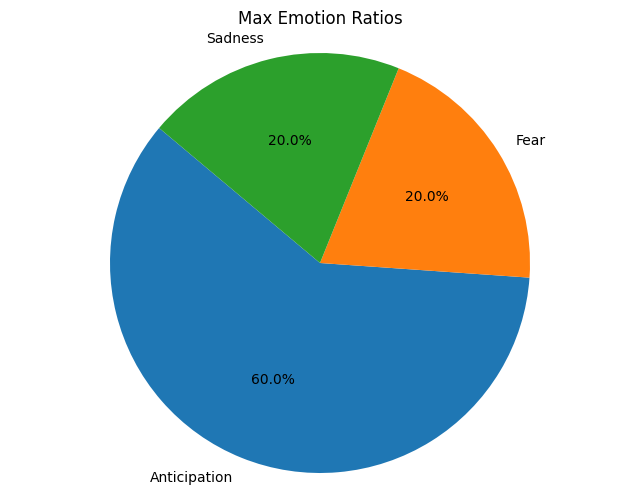

In [73]:
#ÂàÜÊûê„Éá„Éº„Çø„ÅÆË™≠„ÅøËæº„Åø
df = pd.read_csv('test.csv',names=['text'])

# DataFrame„Åã„ÇâÂêÑË°å„ÅÆÂÄ§„ÇíÂèñ„ÇäÂá∫„Åó„Å¶analyze_emotionÈñ¢Êï∞„ÇíÂÆüË°å
results = []
for index, row in df.iterrows():
    result = analyze_emotion(row['text'])
    results.append(result)

# ÁµêÊûú„ÇíDataFrame„Å´Â§âÊèõ
result_df = pd.DataFrame(results,columns=['text'] + emotion_names)

#result_df„ÅÆemotion_namesÂàó„ÅÆÂÄ§„ÅÆ„Éá„Éº„ÇøÂûã„ÇíÂ§âÊèõ
result_df[emotion_names] = result_df[emotion_names].astype(float)

# ÂêÑË°å„ÅßÊúÄ„ÇÇÂ§ß„Åç„ÅÑÂÄ§„ÇíÊåÅ„Å§Âàó„ÅÆ„Ç´„É©„É†Âêç„ÇíÂèñÂæó„Åó„ÄÅÂàó„Å´ËøΩÂä†
result_df['max_emotion'] = result_df[['Joy', 'Sadness', 'Anticipation', 'Surprise', 'Anger', 'Fear','Disgust','Trust']].idxmax(axis=1)

# max_emotion„ÅÆÂâ≤Âêà„ÇíÁÆóÂá∫
max_emotion_counts = result_df['max_emotion'].value_counts()
max_emotion_ratios = max_emotion_counts / len(result_df)

import matplotlib.pyplot as plt

# max_emotion„ÅÆÂâ≤Âêà„ÇíÂÜÜ„Ç∞„É©„Éï„ÅßË°®Á§∫
plt.figure(figsize=(8, 6))
plt.pie(max_emotion_ratios, labels=max_emotion_ratios.index, autopct='%1.1f%%', startangle=140)
plt.title('Max Emotion Ratios')
plt.axis('equal')  # „Ç¢„Çπ„Éö„ÇØ„ÉàÊØî„Çí‰øùÊåÅ„Åó„Å¶ÂÜÜ„ÇíÊèèÁîª„Åô„Çã
plt.show()



# Ê§úË®ºÁî®„Ç≥„Éº„Éâ

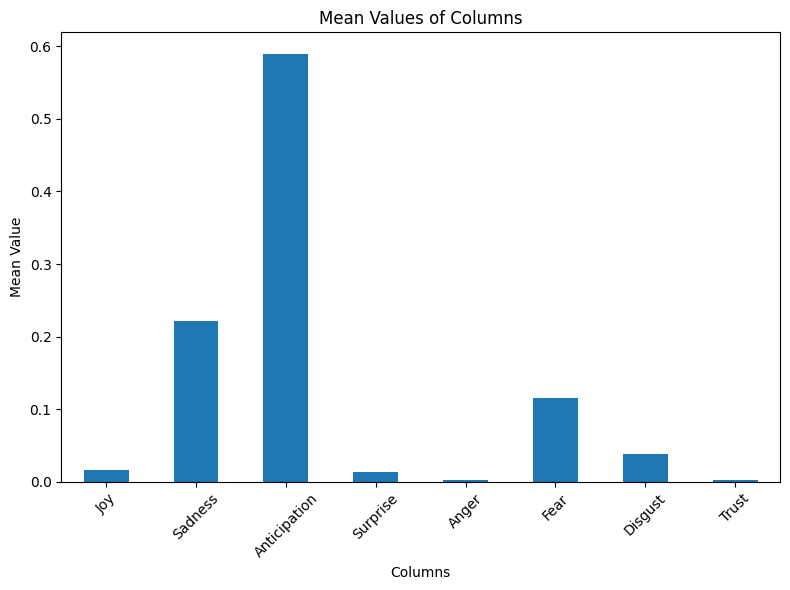

In [81]:
#ÂàÜÊûê„Éá„Éº„Çø„ÅÆË™≠„ÅøËæº„Åø
df = pd.read_csv('test.csv',names=['text'])

# DataFrame„Åã„ÇâÂêÑË°å„ÅÆÂÄ§„ÇíÂèñ„ÇäÂá∫„Åó„Å¶analyze_emotionÈñ¢Êï∞„ÇíÂÆüË°å
results = []
for index, row in df.iterrows():
    result = analyze_emotion(row['text'])
    results.append(result)

# ÁµêÊûú„ÇíDataFrame„Å´Â§âÊèõ
result_df = pd.DataFrame(results,columns=['text'] + emotion_names)

#result_df„ÅÆemotion_namesÂàó„ÅÆÂÄ§„ÅÆ„Éá„Éº„ÇøÂûã„ÇíÂ§âÊèõ
result_df[emotion_names] = result_df[emotion_names].astype(float)

# Âàó„Åî„Å®„ÅÆÂÄ§„ÅÆÂπ≥Âùá„ÇíÁÆóÂá∫
column_means = result_df[emotion_names].mean()

import matplotlib.pyplot as plt

# column_means„ÇíÊ£í„Ç∞„É©„Éï„ÅßË°®Á§∫
plt.figure(figsize=(8, 6))
column_means.plot(kind='bar')
plt.xlabel('Columns')
plt.ylabel('Mean Value')
plt.title('Mean Values of Columns')
plt.xticks(rotation=45)  # xËª∏„ÅÆ„É©„Éô„É´„Çí45Â∫¶ÂõûËª¢„Åï„Åõ„Çã
plt.tight_layout()  # „Ç∞„É©„Éï„ÅÆ„É¨„Ç§„Ç¢„Ç¶„Éà„ÇíË™øÊï¥
plt.show()